## imports

In [176]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import os
from matplotlib.backends.backend_pdf import PdfPages

In [177]:
af = pd.read_csv("/mnt/data/scene_rec/gsv_comb_split_AF/gsv_comb_split_AF.csv", header=0, index_col=0)
af[["main_tag","sub_tag"]] = af.tags.str.rsplit(";",expand=True)
af.sub_tag.fillna("glass", inplace=True)
kv = pd.read_csv("/mnt/data/scene_rec/gsv_comb_split_KV/gsv_comb_split_KV.csv", header=0, index_col=0)
cols = kv.columns.tolist()[35:]
# to remove the top N cols


## produces boxplots for each dataset against image tag

## analysis

In [162]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import shutil

aig = pd.read_excel("/mnt/data/scene_rec/AIG_draft_data3.xlsx", sheetname="Data")
feature_set= pd.concat([af[["building"] + cols], kv[["building"] + cols]], ignore_index=False)
feature_set = feature_set.merge(aig[["BE No", "Soft Storey"]], how="left", left_on="building", right_on="BE No")
feature_set["Soft Storey"].fillna(0, inplace=True)

fulldf = pd.concat([af[kv.columns.tolist()],kv[kv.columns.tolist()]])
fulldf = fulldf.merge(aig[["BE No", "Soft Storey"]], how="left", left_on="building", right_on="BE No")
fulldf.set_index("image", inplace=True)

In [7]:
# examining the image features of buildings identified as soft storey to client
fulldf[fulldf["Soft Storey"]>0][fulldf.columns.tolist()[4:9] + fulldf.columns.tolist()[14:24]]

cat_1                       cat_2  \
image                                                          
1828_0         construction_site             industrial_area   
494_5             science_museum                artists_loft   
494_3               artists_loft                beauty_salon   
494_4               artists_loft                beauty_salon   
1714_4                     attic              elevator_shaft   
1828_5           library/outdoor                     embassy   
1828_6            hangar/outdoor                loading_dock   
1828_7               water_tower             industrial_area   
494_2                 oast_house                   courtyard   
1714_5                   embassy              elevator_shaft   
1714_7           library/outdoor                     embassy   
1714_6           library/outdoor                     embassy   
494_1                  shopfront                     embassy   
1828_1                   embassy                    hospital   
1828_3                   embassy               hotel/outdoor   
494_7                  shopfront                    pharmacy   
1828_2                   embassy           synagogue/outdoor   
494_0                    embassy                   shopfront   
1714_0           library/outdoor                     embassy   
494_6                    embassy                   shopfront   
1714_3                   embassy             library/outdoor   
1714_1           library/outdoor                     embassy   
1714_2                   embassy             library/outdoor   
1828_4                   embassy               hotel/outdoor   
663_3                     street    residential_neighborhood   
663_7               artists_loft                       attic   
1798_6                     swamp               canal/natural   
663_4                     street                 phone_booth   
943_0           department_store                   bookstore   
894_7                    embassy             library/outdoor   
...                          ...                         ...   
1653_3                   embassy             library/outdoor   
1802_7           library/outdoor                     embassy   
894_3            library/outdoor           synagogue/outdoor   
663_5                inn/outdoor       general_store/outdoor   
3692_4  residential_neighborhood                 phone_booth   
3692_5    parking_garage/outdoor  apartment_building/outdoor   
1794_6         synagogue/outdoor                     embassy   
943_4                  shopfront                   bookstore   
1741_4           industrial_area                fire_station   
1741_6           industrial_area                fire_station   
1798_7  residential_neighborhood      parking_garage/outdoor   
1653_4                   embassy             library/outdoor   
1741_7              fire_station             industrial_area   
1653_2                   embassy             library/outdoor   
943_3               loading_dock             library/outdoor   
3692_6    parking_garage/outdoor                       alley   
1802_5           library/outdoor                     embassy   
1802_1           library/outdoor                     embassy   
894_4            library/outdoor           synagogue/outdoor   
943_7                  bookstore       general_store/outdoor   
1798_0    parking_garage/outdoor    residential_neighborhood   
894_1            library/outdoor                     embassy   
1741_3              fire_station                loading_dock   
1794_5                courthouse           synagogue/outdoor   
1794_3         synagogue/outdoor                  courthouse   
1741_2              fire_station                loading_dock   
1802_4           library/outdoor                     embassy   
943_1                 oast_house                   courtyard   
1653_5                   embassy             library/outdoor   
3692_0                   embassy            balcony/exterio

In [5]:
top_cats_ss = fulldf[fulldf["Soft Storey"]>0][fulldf.columns.tolist()[4:9]]
ss_cats = top_cats_ss.melt().groupby("value").count().query("variable > 5").sort_values("variable", ascending=False)
ss_cats

variable
value                               
embassy                           62
library/outdoor                   49
parking_garage/outdoor            41
synagogue/outdoor                 27
office_building                   26
hospital                          25
hotel/outdoor                     22
courthouse                        17
apartment_building/outdoor        14
fire_station                      11
industrial_area                   10
residential_neighborhood          10
balcony/exterior                   9
loading_dock                       9
campus                             9
shopfront                          9
hangar/outdoor                     8
general_store/outdoor              7
oast_house                         7
bookstore                          7
street                             7
pharmacy                           6
schoolhouse                        6
inn/outdoor                        6

In [42]:
places = ["general_store/outdoor"]

for place in places:
    save_dir = "/mnt/data/scene_rec/top5_%s" % place.replace("/","_")
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    for k, v in fulldf[fulldf.iloc[:,4:9].isin([place]).sum(axis=1)>0].iterrows():
        shutil.copy2(v.paths, save_dir)

In [15]:
top_atts_ss = fulldf[fulldf["Soft Storey"]>0][fulldf.columns.tolist()[14:24]]
ss_atts = top_atts_ss.melt().groupby("value").count().query("variable > 5").sort_values("variable", ascending=False)
ss_atts

variable
value                          
man-made                     96
no horizon                   91
open area                    90
natural light                90
glass                        84
vertical components          75
clouds                       55
brick                        46
sunny                        44
horizontal components        40
metal                        33
driving                      32
glossy                       25
shingles                     24
asphalt                      17
pavement                     14
enclosed area                14
wood                          9
biking                        8
transporting                  8
indoor lighting               6
trees                         6

In [135]:
# viewing the other top categories when shop front is in the top 5
top5_shopfront = fulldf[fulldf.iloc[:,4:9].isin(["shopfront"]).sum(axis=1)>0]
top5_shopfront.iloc[:,4:9].melt().groupby("value").count().query("variable > 5").sort_values("variable", ascending=False)

variable
value                           
shopfront                    168
general_store/outdoor        115
embassy                       83
synagogue/outdoor             76
bookstore                     66
hotel/outdoor                 65
pharmacy                      58
inn/outdoor                   53
hardware_store                42
library/outdoor               16
gas_station                   14
phone_booth                    9
fire_station                   8
hospital                       7
parking_garage/outdoor         7
courthouse                     6
oast_house                     6

In [57]:
# extracting category when not in top 5 of other categories
exclude = ["shopfront"]
include = ["general_store/outdoor"]
not_top5_shopfront = fulldf[fulldf.iloc[:,4:9].isin(exclude).sum(axis=1)==0]
subset = not_top5_shopfront[not_top5_shopfront.iloc[:,4:9].isin(include).sum(axis=1) > 0]
# nsf_general_store_outdoor.iloc[:,4:9].melt().groupby("value").count().query("variable > 5").sort_values("variable", ascending=False)
for place in places:
    save_dir = "/mnt/data/scene_rec/%s_NOT_in_top5_of_%s" % (place.replace("/","_"), "_".join(exclude).replace("/","_"))
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    for k, v in subset.iterrows():
        shutil.copy2(v.paths, save_dir)

## Creating new subplots for faster analysis

In [179]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import gridspec 

0 airfield of  467
1 airplane_cabin of  467


KeyboardInterrupt: 

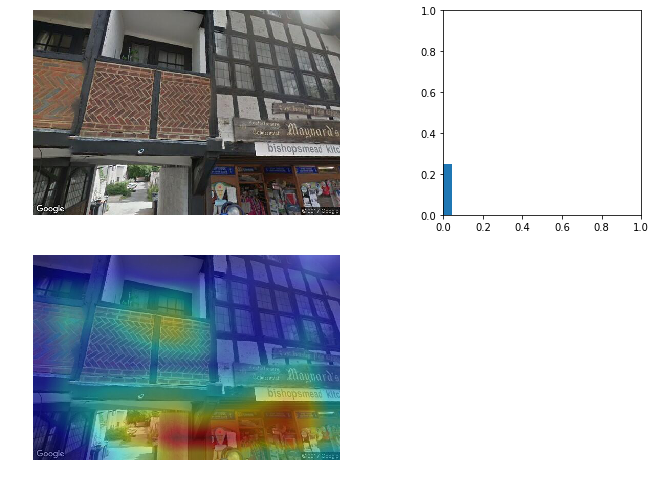

In [181]:
for i, col in enumerate(cols):
    print(i, col, "of ", len(cols))
    with PdfPages("/mnt/data/scene_rec/%s.pdf" % col) as pdf:
        for k, v in top5_shopfront.iterrows():
            img = mpimg.imread(v.paths)
            cam = mpimg.imread(v.paths.replace("data/","data/scene_rec/").replace("image_",""))
            fig = plt.figure(figsize=(11.69,8.27))
            gs = gridspec.GridSpec(2, 2, width_ratios=[2, 1]) 
            plt.subplot(gs[0]).imshow(img)
            plt.axis('off')
            plt.subplot(gs[2]).imshow(cam)
            plt.axis('off')
            plt.subplot(gs[1])
            pd.DataFrame(v.iloc[9:14].tolist(), v.iloc[4:9].tolist()).sort_values(by=0).plot.barh(xlim=(0,0.8),ax=plt.gca(), legend=False)
            plt.title("Top 5 Scenes")
            plt.subplot(gs[3])
            pd.DataFrame(v.iloc[24:34].tolist(), v.iloc[14:24].tolist()).sort_values(by=0).plot.barh(ax=plt.gca(), legend=False)
            plt.title("Top 10 Attributes")
            fig.tight_layout()
            pdf.savefig()
            plt.close()

In [173]:
fulldf["bmg"] = fulldf.tags.str.split(";", expand=True)[0].replace("whitepaintedbrick", "brick").replace('brick_noise','noise')